# Analyzing a bank's churn and making a machine learning model for prediction and future analysis!

In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('Bank_Customer_Churn_Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


#### Converting object type to int

In [4]:
encoder = LabelEncoder()
data['country'] = encoder.fit_transform(data['country'])
data['gender'] = encoder.fit_transform(data['gender'])
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.drop('customer_id', axis=1, inplace=True)

### Ploting datas in order to get a better understanding of the dataset

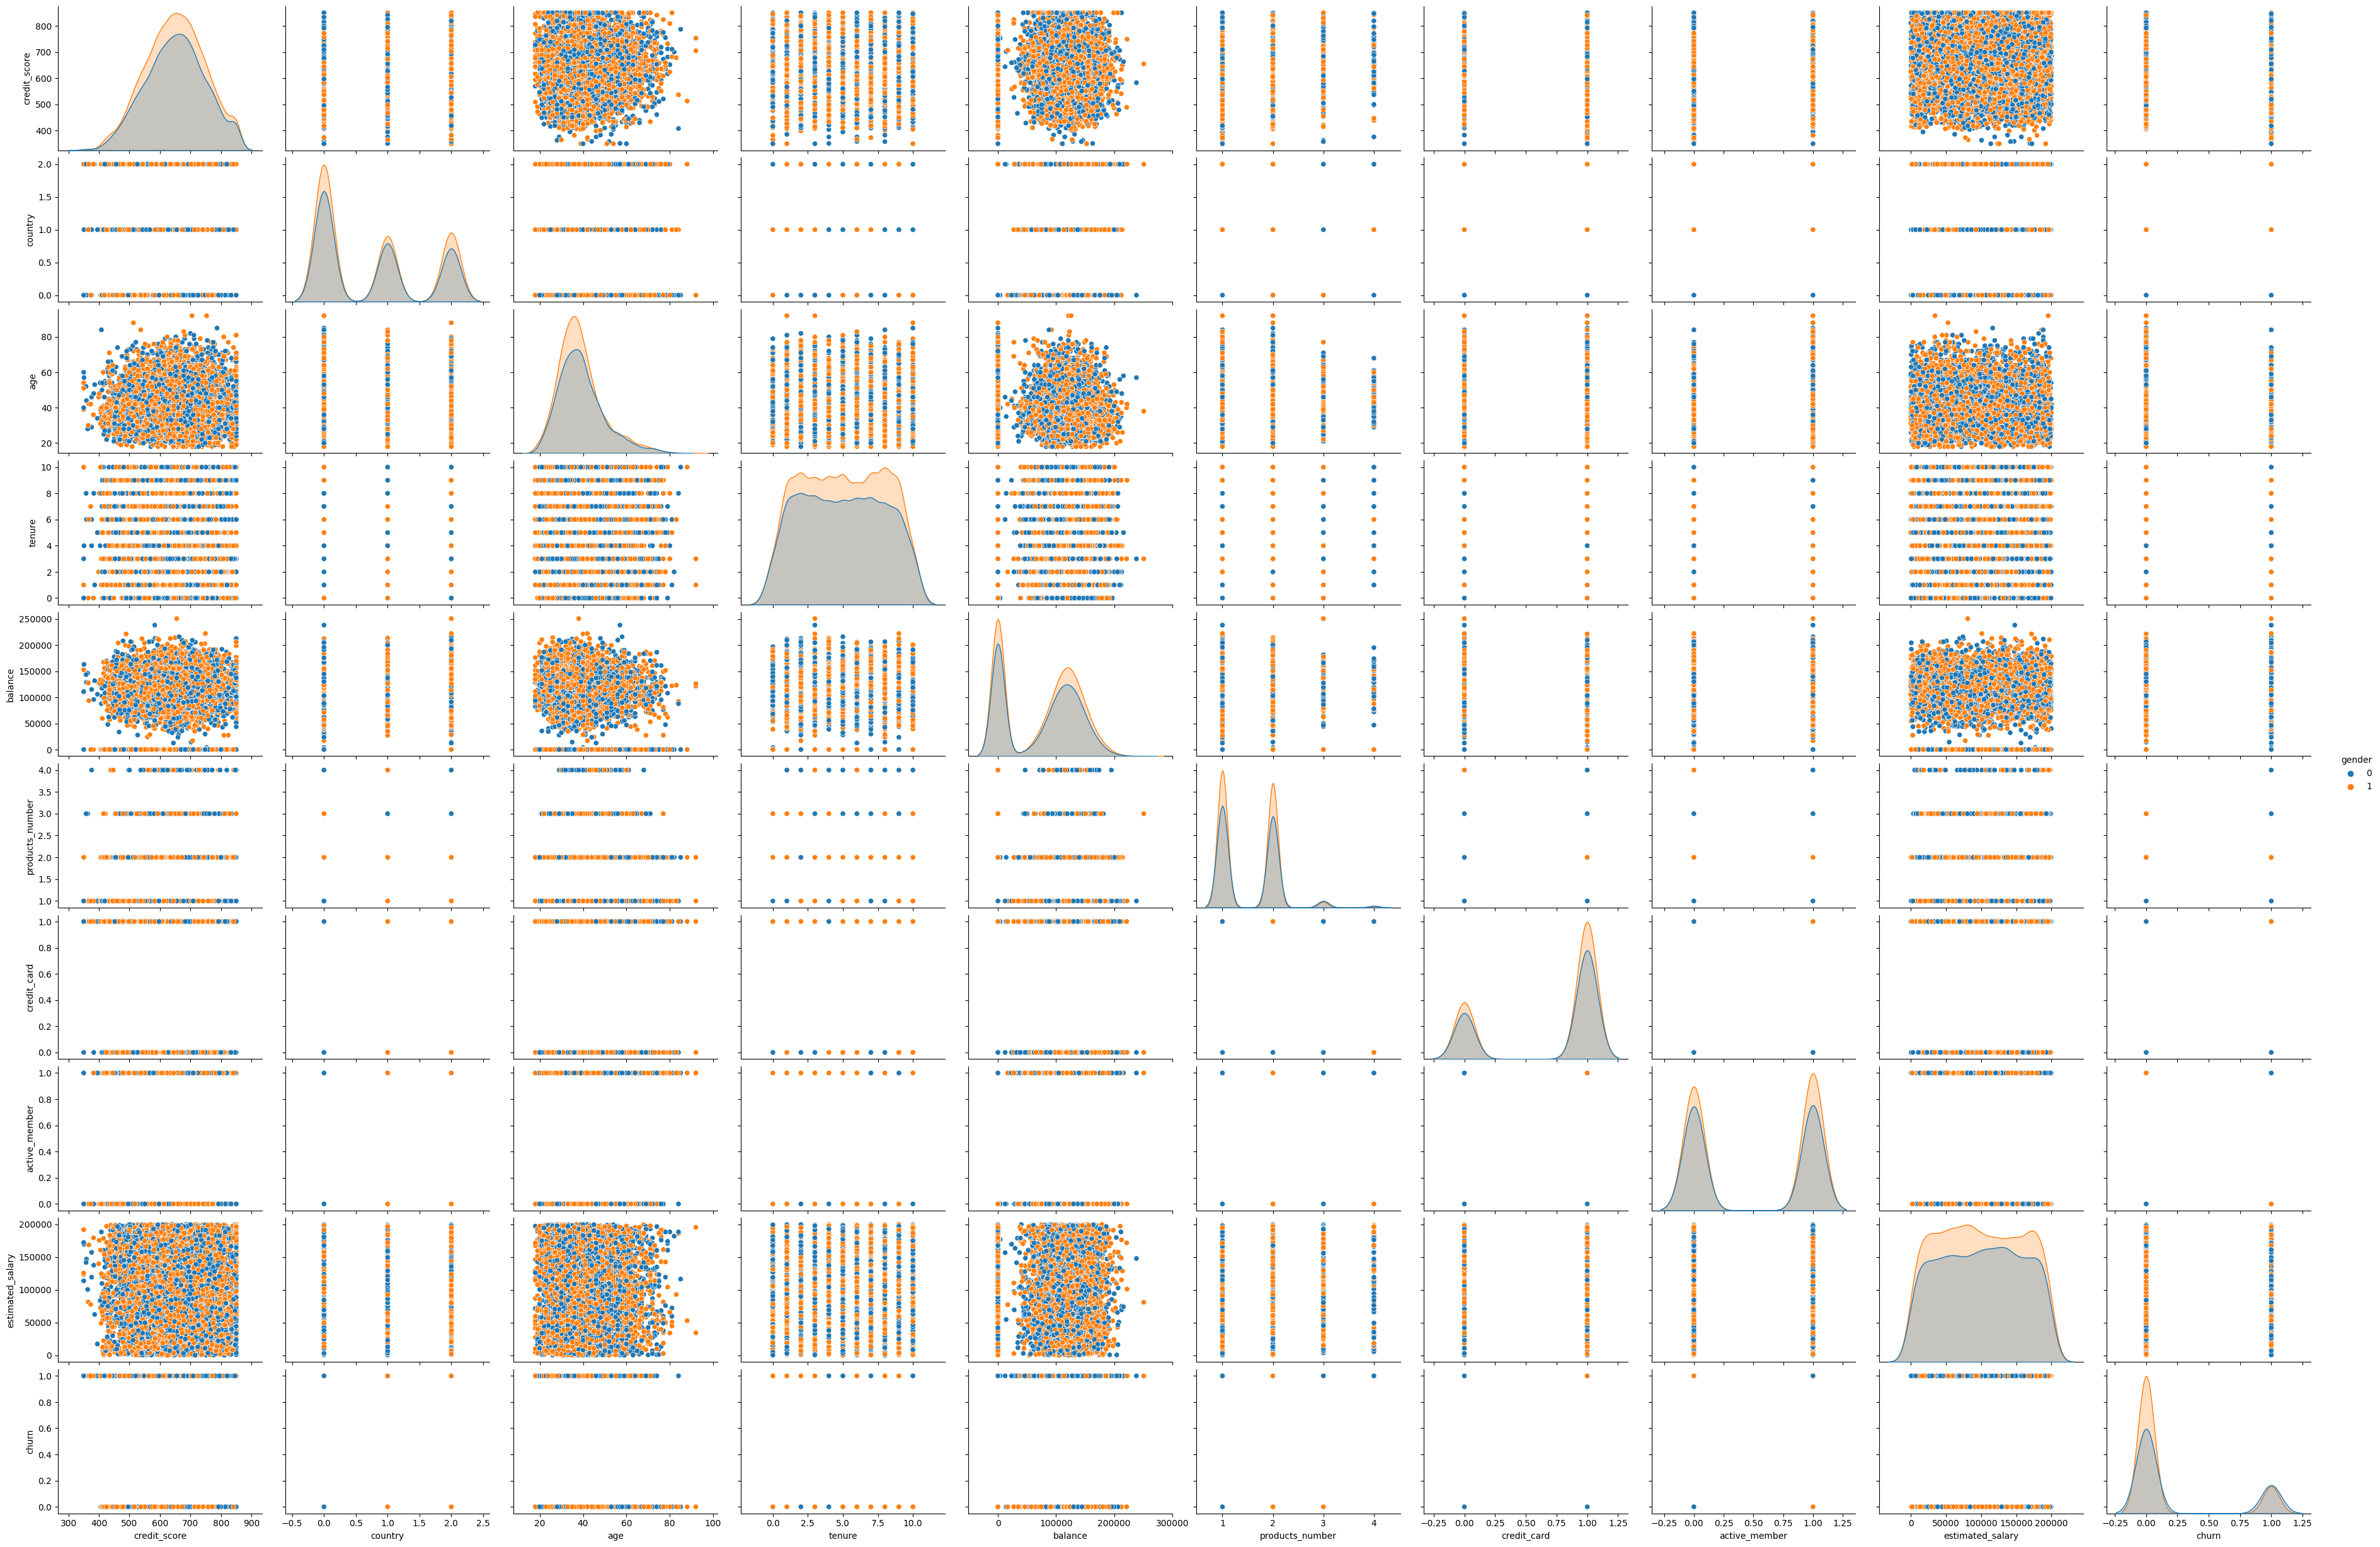

In [6]:
sns.pairplot(data, hue='gender', aspect=1.5)
plt.show()

In [7]:
# determining X and y and scaling X
scaler = StandardScaler()

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

X = scaler.fit_transform(X)
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Distinguishing the most important features using Random Forest

In [9]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f) ---> %s" % (f + 1, indices[f], importances[indices[f]], data.columns[indices[f]]))

Feature ranking:
1. feature 3 (0.417635) ---> age
2. feature 6 (0.349197) ---> products_number
3. feature 8 (0.103709) ---> active_member
4. feature 5 (0.045012) ---> balance
5. feature 1 (0.027156) ---> country
6. feature 2 (0.018910) ---> gender
7. feature 0 (0.017577) ---> credit_score
8. feature 9 (0.013595) ---> estimated_salary
9. feature 4 (0.006333) ---> tenure
10. feature 7 (0.000876) ---> credit_card


### Making the model without feature selection

In [10]:
# using Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [11]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.81505727, 0.18494273],
       [0.89518498, 0.10481502],
       [0.64606987, 0.35393013],
       ...,
       [0.66131514, 0.33868486],
       [0.89751973, 0.10248027],
       [0.85702927, 0.14297073]])

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  61  332]
 [  43 1564]]


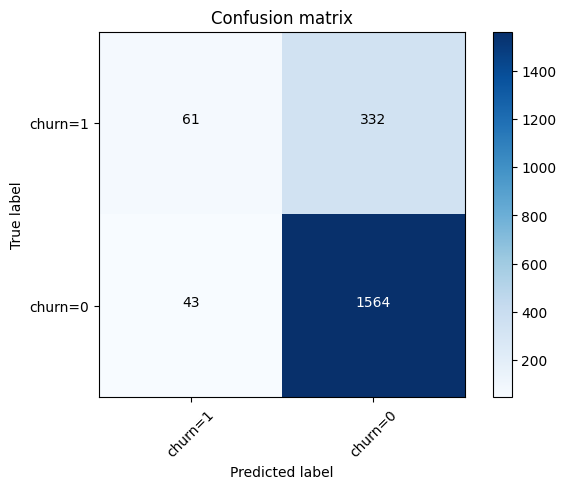

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [15]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.59      0.16      0.25       393

    accuracy                           0.81      2000
   macro avg       0.71      0.56      0.57      2000
weighted avg       0.78      0.81      0.77      2000



### Solving being an imbalanced dataset problem with SMOTETomek

In [16]:
smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=42)

In [18]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [19]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [20]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.3 , 0.7 ],
       [0.74, 0.26],
       [0.07, 0.93],
       ...,
       [0.43, 0.57],
       [0.78, 0.22],
       [0.64, 0.36]])

Confusion matrix, without normalization
[[1626  690]
 [ 667 1719]]


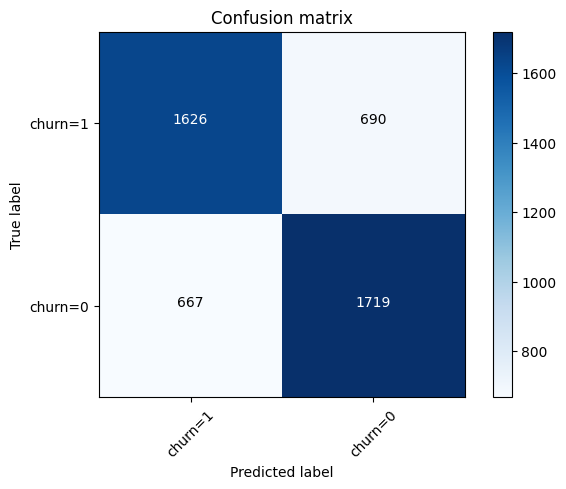

In [21]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [22]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      2386
           1       0.71      0.70      0.71      2316

    accuracy                           0.71      4702
   macro avg       0.71      0.71      0.71      4702
weighted avg       0.71      0.71      0.71      4702



### Determining the accuracy of several classification algorithms on this dataset

In [23]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', svm.SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    Results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy')
    results.append(Results)
    names.append(name)

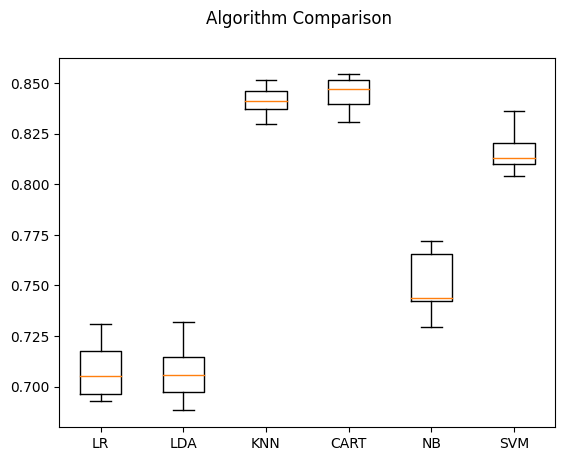

In [24]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Making the model with feature selection and also using SMOTETomek

In [25]:
columns = ['credit_score','country','gender','tenure','credit_card','estimated_salary']
newdata = data.drop(columns=columns, axis=1)

X = newdata.iloc[:,:-1].values
y = newdata.iloc[:,-1].values
X = scaler.fit_transform(X)

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X, y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.3, random_state=42)

In [27]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', svm.SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    Results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy')
    results.append(Results)
    names.append(name)

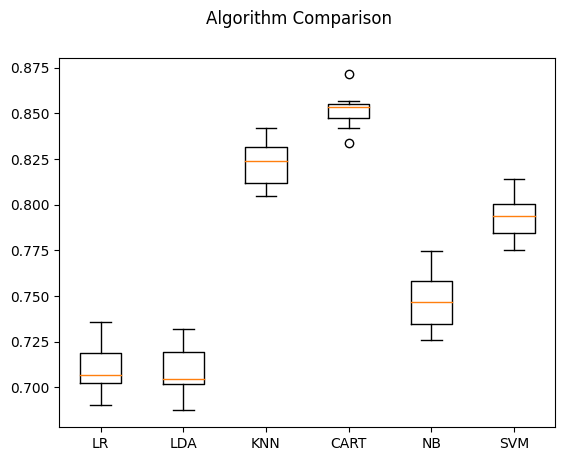

In [28]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [29]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [30]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [31]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.84, 0.16],
       [0.39, 0.61],
       [0.4 , 0.6 ],
       ...,
       [0.61, 0.39],
       [0.54, 0.46],
       [0.43, 0.57]])

Confusion matrix, without normalization
[[1552  625]
 [ 686 1565]]


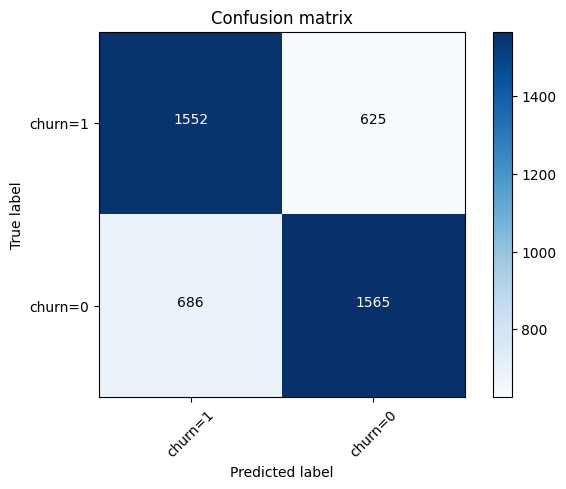

In [32]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [33]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70      2251
           1       0.69      0.71      0.70      2177

    accuracy                           0.70      4428
   macro avg       0.70      0.70      0.70      4428
weighted avg       0.70      0.70      0.70      4428



In [34]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for k in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.86, 0.83, 0.82, 0.82, 0.82, 0.82, 0.81, 0.81, 0.81])

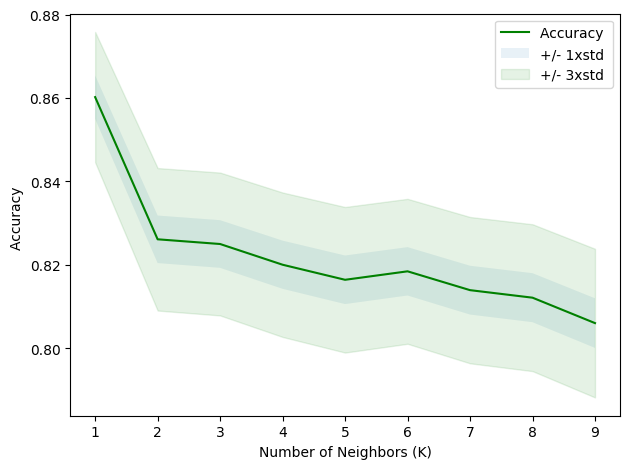

In [35]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [36]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [37]:
yhat = knn.predict(X_test)
yhat

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
print('train accuracy is:', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('test accuracy is:', metrics.accuracy_score(y_test, yhat))

train accuracy is: 0.8994191674733785
test accuracy is: 0.8249774164408311


Confusion matrix, without normalization
[[1831  346]
 [ 429 1822]]


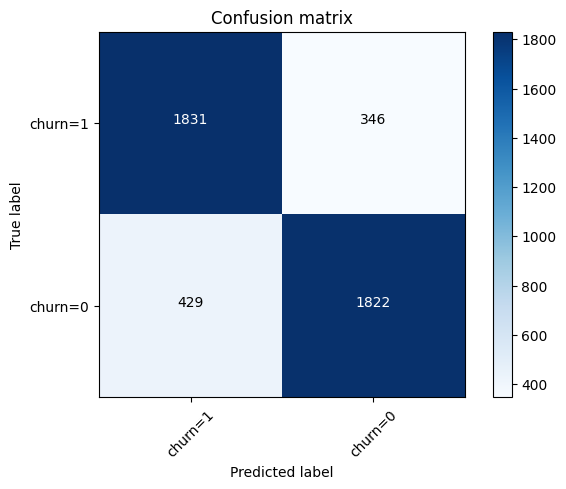

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [40]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2251
           1       0.81      0.84      0.83      2177

    accuracy                           0.82      4428
   macro avg       0.83      0.83      0.82      4428
weighted avg       0.83      0.82      0.82      4428



In [41]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [42]:
yhat = clf.predict(X_test)
yhat

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2251
           1       0.80      0.74      0.77      2177

    accuracy                           0.78      4428
   macro avg       0.78      0.78      0.78      4428
weighted avg       0.78      0.78      0.78      4428

Confusion matrix, without normalization
[[1849  402]
 [ 562 1615]]


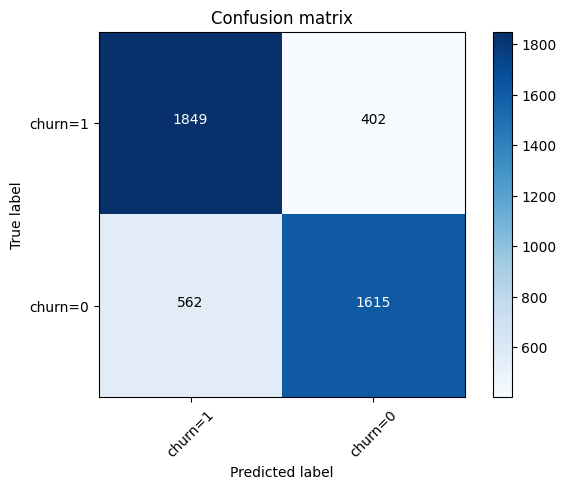

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

## We can see that KNN has a higher accuracy among other algorithms like Logistic Regression and Support Vector Machine on this dataset. So, We can use this KNN model for future use.